In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd 
from scipy import signal
import statistics
import matplotlib.pyplot as plt
import math
import os
import glob
import seaborn as sns; sns.set()

def signal_generation(lg, leg_pool, mode_pool):
  raw_dir = "/content/drive/My Drive/ML Data/Offline Mode Classification Raw Data/"
  window_size = 350
  transition_point = 0.2
  
  trial_pool = [1, 2, 3]
  subject_pool = ["06", "07", "08", "09", "10", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "23", "24", "25", "27", "28"]

  transition1_average_signal = []
  transition2_average_signal = []
  # Reading Data Files
  for subject in subject_pool:

      transition1_signal = []
      transition2_signal = []
      for mode in mode_pool:
          for trial in trial_pool:
              for starting_leg in leg_pool:
                  if lg == 0:
                    data_path = raw_dir+"AB"+subject+"_"+str(mode)+"_S2_T"+str(trial)+".csv"
                    
                    if os.path.exists(data_path) == 1:
                        for data_read_path in glob.glob(data_path):
                            data = pd.read_csv(data_read_path, header=0)
                            feature_data = data.iloc[:, :-3].to_numpy()
                            mode_label = data.iloc[:, -3].to_numpy()


                  else:
                    data_path = raw_dir+"AB"+subject+"_"+str(mode)+"_S2_"+str(starting_leg)+"_T"+str(trial)+".csv"

                    if os.path.exists(data_path) == 1:
                        for data_read_path in glob.glob(data_path):
                            data = pd.read_csv(data_read_path, header=0)
                            feature_data = data.iloc[:, :-3].to_numpy()
                            mode_label = data.iloc[:, -3].to_numpy()
                            
                    # Segmenting data out into first and second transition gait cycle
                    transition_mode_diff = np.where(np.diff(np.transpose(mode_label))!=0)[0]          
                    transition_1 = feature_data[np.arange(0, transition_mode_diff[0]+1)]
                    transition_2 = feature_data[np.arange(transition_mode_diff[1]+1, len(mode_label))]
                    
                    # Upsampling the signal and append to a list
                    transition1_raw_signal = []
                    transition2_raw_signal = []
                    for ii in np.arange(0, np.shape(transition_1)[1]):
                        transition1_raw_signal.append(np.interp(np.linspace(0, 100, 1000), np.linspace(0, 100, len(transition_1)), transition_1[:, ii]))
                        transition2_raw_signal.append(np.interp(np.linspace(0, 100, 1000), np.linspace(0, 100, len(transition_2)), transition_2[:, ii]))
                    # Appending the upsampled trial data to a subject signal
                    transition1_signal.append(transition1_raw_signal)
                    transition2_signal.append(transition1_raw_signal)

      # Averaging the signal within the subject and appending to a total array
      transition1_average_signal.append(np.mean(transition1_signal, axis = 0))
      transition2_average_signal.append(np.mean(transition2_signal, axis = 0))

  # Computing mean and std of the sensor signal across subjects
  transition1_mean_signal = np.mean(transition1_average_signal, axis = 0)
  transition1_std_signal = np.std(transition1_average_signal, axis = 0)
  transition2_mean_signal = np.mean(transition2_average_signal, axis = 0)
  transition2_std_signal = np.std(transition2_average_signal, axis = 0)

  return transition1_mean_signal, transition1_std_signal, transition2_mean_signal, transition2_std_signal

In [ ]:
mean1, std1, mean2, std2 = signal_generation(["R"], ["RA2", "RA3", "RA4", "RA5"])

# print(np.shape(transition1_mean_signal))
# plt.plot(transition1_mean_signal[0])
# plt.show()

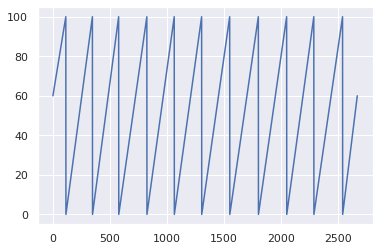

[ 114  347  577  824 1064 1304 1550 1801 2049 2287 2539]


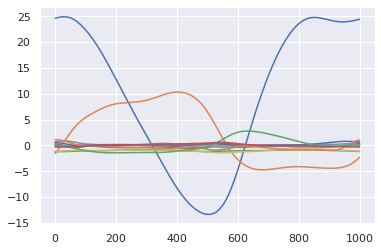

In [46]:
import numpy as np
import pandas as pd 
from scipy import signal
import statistics
import matplotlib.pyplot as plt
import math
import os
import glob
import seaborn as sns; sns.set()

raw_dir = "/content/drive/My Drive/ML Data/Offline Mode Classification Raw Data/"

trial_pool = [3]
subject_pool = ["08"]
leg_pool = ["R"]
mode_pool = ["LG"]
lg = 0

transition1_average_signal = []
transition2_average_signal = []
# Reading Data Files
for subject in subject_pool:

    transition1_signal = []
    transition2_signal = []
    for mode in mode_pool:
        for trial in trial_pool:
            for starting_leg in leg_pool:
                if lg == 0:
                  data_path = raw_dir+"AB"+subject+"_"+str(mode)+"_S2_T"+str(trial)+".csv"
                  
                  if os.path.exists(data_path) == 1:
                      for data_read_path in glob.glob(data_path):
                          data = pd.read_csv(data_read_path, header=0)
                          feature_data = data.iloc[:, :-3].to_numpy()
                          gc_label = data.iloc[:, -2].to_numpy()

                else:
                  data_path = raw_dir+"AB"+subject+"_"+str(mode)+"_S2_"+str(starting_leg)+"_T"+str(trial)+".csv"

hc_idx = np.where(gc_label == 0)[0]
final_signal = []
for ii in np.arange(len(hc_idx)-1):
  signal = []
  for jj in np.arange(0, np.shape(feature_data)[1]):
    one_gc_feature = feature_data[hc_idx[ii]:hc_idx[ii+1]-1]
    signal.append(np.interp(np.linspace(0, 100, 1000), np.linspace(0, 100, len(one_gc_feature)), one_gc_feature[:, jj]))
  final_signal.append(signal)
LG_mean_signal = np.mean(final_signal, axis = 0)
LG_std_signal = np.std(final_signal, axis = 0)

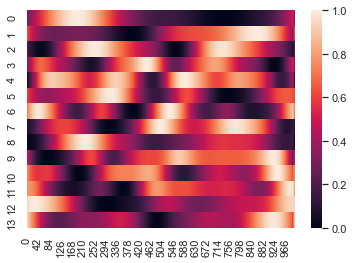

In [ ]:
ax = sns.heatmap(np.transpose(data_t1))